In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import scipy.integrate as int
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (7,7)

Let's solve the following system

\begin{align}
y_1' &= a y_1 + b y_2 \\
y_2' &= c y_1 + d y_2
\end{align}

We can collect the 4 coreeficients in a matrix $A$ which has the eigenvalues $\lambda_1, \lambda_2$. They are given by

$$
\lambda_{1,2} = \frac{\tau \pm \sqrt{\tau^2 - 4 \Delta}}{2}
$$

with

$$
\tau = a + d
$$

and

$$
\Delta = ad - bc
$$

In [36]:
# damped oscillations
a = 0
d = -1
b = -1
c = 1

In [37]:
# increasing oscillations
a = 0
d = 1
b = -1
c = 1

In [54]:
# constant oscillations
a = 0
d = 0
b = -1
c = 1

In [55]:
def dX_dt(X, t=0):
    return np.array([ a*X[0]   +   b*X[1] ,
                      c*X[0]   +   d*X[1]])

In [56]:
t  = np.linspace(0, 20, 1000)
y0 = [1. , 1.]

X, infodict = int.odeint(dX_dt, y0, t, full_output=True)
infodict['message']

'Integration successful.'

Text(0, 0.5, '$y_1, y_2$')

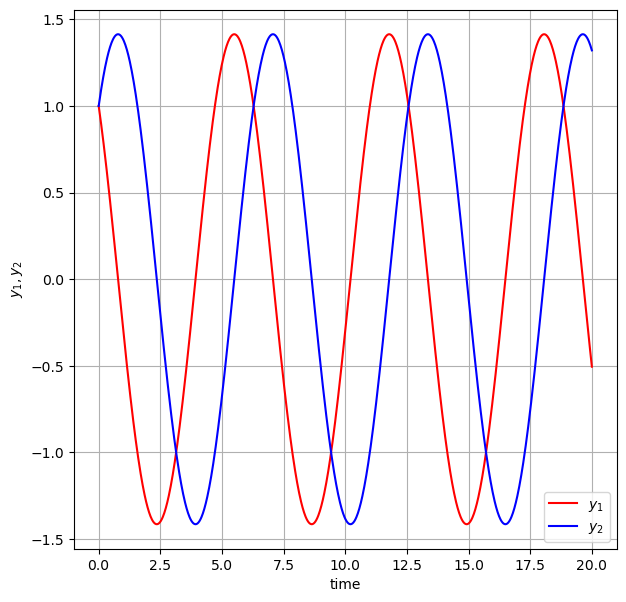

In [57]:
y1, y2 = X.T

plt.plot(t, y1, 'r-', label='$y_1$')
plt.plot(t, y2  , 'b-', label='$y_2$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('$y_1, y_2$')

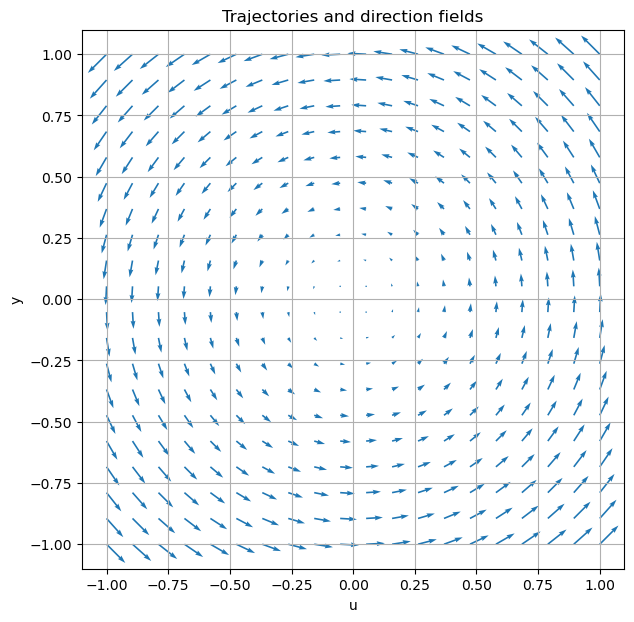

In [58]:
x = np.linspace(-1, 1, 20)
y = np.linspace(-1, 1, 20)

X1 , Y1  = np.meshgrid(x, y)                    # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute derivative on grid

# let's skip normalization as it hides the fact that the phase portrait has spiral form...


#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, color="C0")
plt.xlabel('u')
plt.ylabel('y')
plt.grid()